In [1]:
!pip install emnist

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, Dropout
from keras.utils import to_categorical
import emnist
import numpy as np
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
images_balanced, labels_balanced = emnist.extract_training_samples('balanced')

In [4]:
print("ByClass Split - Images:", images_balanced.shape, "Labels:", labels_balanced.shape)

ByClass Split - Images: (112800, 28, 28) Labels: (112800,)


In [5]:
def dataPreprocess(images,labels):
    
    #splitting the dataset
    x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)
    
    print(f"There are {len(np.unique(y_train))} output values")
    print(f"X_train Shape: {x_train.shape} ,, X_test shape : {x_test.shape}")
    
    #converting into categorical form
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    #reshaping the training images
    x_train = x_train.reshape((x_train.shape[0],28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0],28,28,1))
    
    #normalizing
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    return x_train,x_test,y_train,y_test

In [6]:
x_train,x_test,y_train,y_test = dataPreprocess(images_balanced,labels_balanced)

There are 47 output values
X_train Shape: (90240, 28, 28) ,, X_test shape : (22560, 28, 28)


In [7]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3), padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2 , padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Flatten())

model.add(Dense(216,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(47,activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                        

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
2820/2820 [==============================] - 19s 5ms/step - loss: 1.0416 - accuracy: 0.6912 - val_loss: 0.4422 - val_accuracy: 0.8471
Epoch 2/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.5722 - accuracy: 0.8175 - val_loss: 0.3964 - val_accuracy: 0.8638
Epoch 3/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.4874 - accuracy: 0.8402 - val_loss: 0.4092 - val_accuracy: 0.8621
Epoch 4/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.4410 - accuracy: 0.8537 - val_loss: 0.3705 - val_accuracy: 0.8751
Epoch 5/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.4038 - accuracy: 0.8638 - val_loss: 0.3585 - val_accuracy: 0.8804
Epoch 6/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.3805 - accuracy: 0.8715 - val_loss: 0.3717 - val_accuracy: 0.8759
Epoch 7/10
2820/2820 [==============================] - 14s 5ms/step - loss: 0.3537 - accuracy: 0.8770 - val_loss: 0.3629 - val_ac

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

705/705 [==============================] - 2s 2ms/step - loss: 0.3611 - accuracy: 0.8879
Test accuracy: 0.8878546357154846


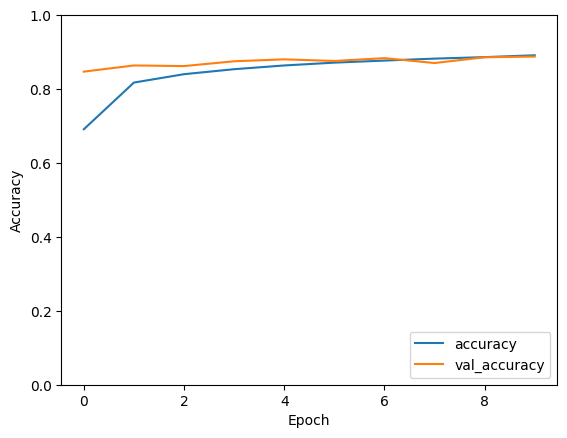

In [12]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [13]:
model.save('my_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
